In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline

# Load the dataset from the data/ folder
data_path = "../data/resume_data.csv" 
df = pd.read_csv(data_path)

# Inspect the first few rows
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [19]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("")

# Show column names and data types
df.info()
print("")

# Check basic descriptive stats (numerical columns only)
df.describe()
print("")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#Number of unique values in each category column
print("Unique values per column:")
print(df['Category'].nunique())
print(df['Category'].unique())

Dataset shape: (2484, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


Missing values per column:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64
Unique values per column:
24
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


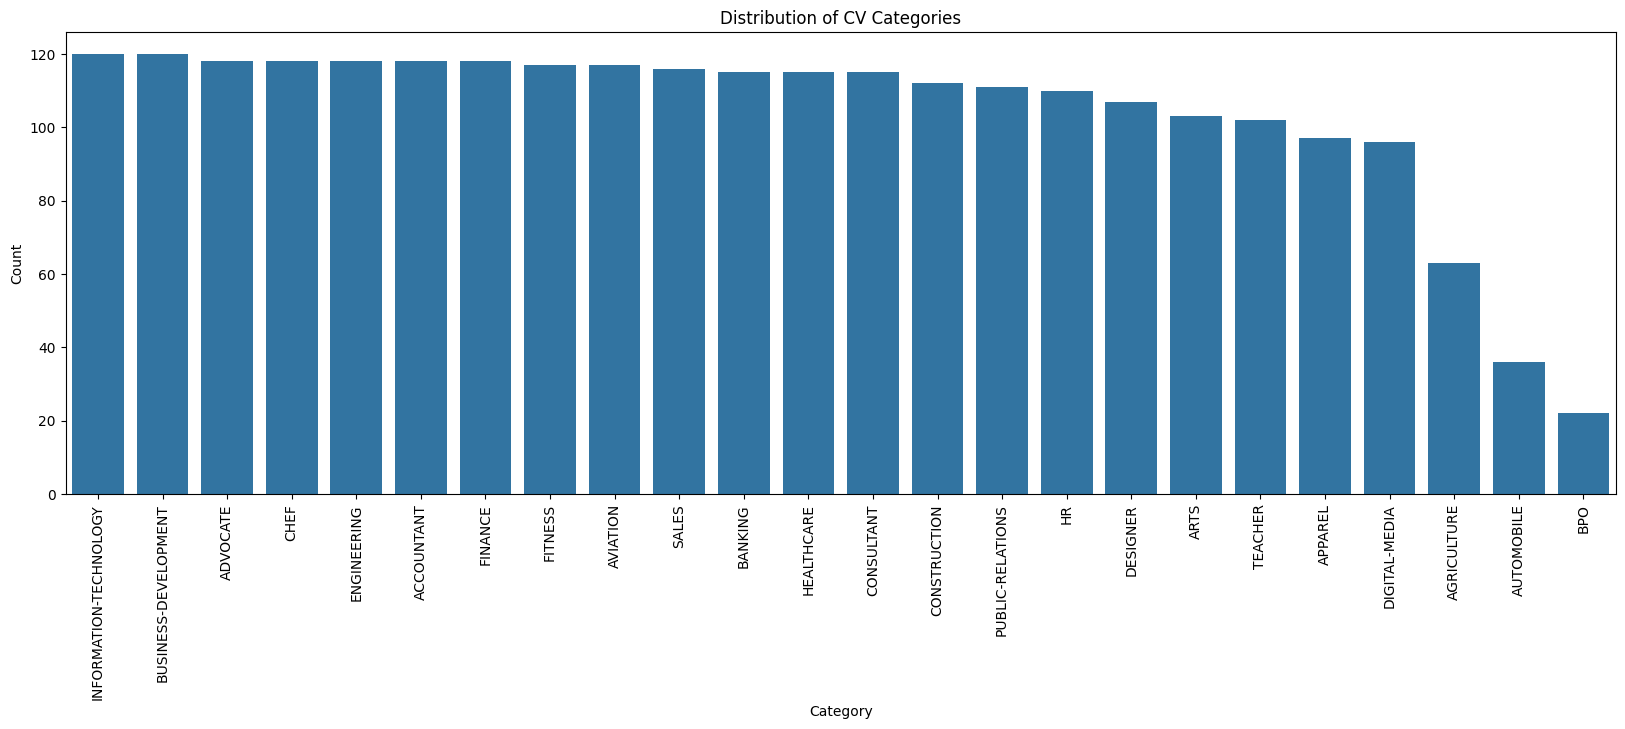

In [20]:
# Count how many resumes per category
category_counts = df["Category"].value_counts()
print(category_counts)

# Quick bar plot of category distribution
plt.figure(figsize=(20, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of CV Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


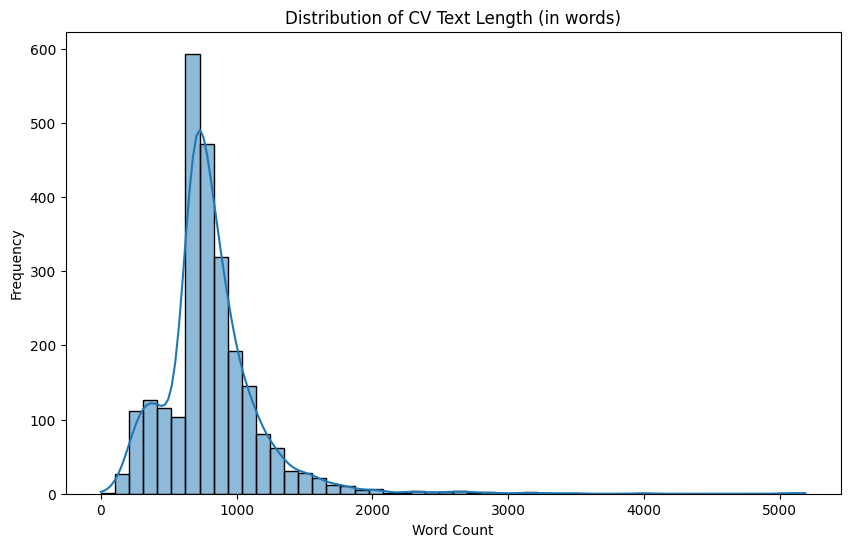

count    2484.000000
mean      811.325684
std       371.006906
min         0.000000
25%       651.000000
50%       757.000000
75%       933.000000
max      5190.000000
Name: resume_length, dtype: float64

In [21]:
# Calculate the length of each CV in terms of word count
df["resume_length"] = df["Resume_str"].apply(lambda x: len(str(x).split()))

# Plot the distribution of CV text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="resume_length", bins=50, kde=True)
plt.title("Distribution of CV Text Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Display descriptive statistics about the CV lengths
df["resume_length"].describe()

In [ ]:
# Group by category and calculate the average CV length
avg_cv_length_by_category = df.groupby('Category')['resume_length'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_cv_length_by_category['Category'], avg_cv_length_by_category['CV_length'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average CV Length')
plt.title('Average CV Length by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Example function: tokenize + lemmatize text
def preprocess_text(text):
    """
    Simple example: convert to doc, remove punctuation & stop words, and lemmatize tokens.
    """
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        # Exclude punctuation, stopwords, or short tokens
        if not token.is_punct and not token.is_stop and len(token.text.strip()) > 2:
            tokens.append(token.lemma_)
    return " ".join(tokens)

# Apply this to a small sample for speed (optional)
sample_df = df.sample(5, random_state=42).copy()
sample_df["processed_resume"] = sample_df["Resume_str"].apply(preprocess_text)
sample_df[["Resume_str", "processed_resume"]].head()


,Resume_str,processed_resume
420,Kpandipou Koffi Summary ...,kpandipou koffi summary compassionate teaching...
1309,DIRECTOR OF DIGITAL TRANSFORMATION ...,director digital transformation executive prof...
2023,SENIOR PROJECT MANAGER Professi...,senior project manager professional summary am...
1360,CHEF Summary Experienced ca...,chef summary experience catering chef skille p...
2186,OPERATIONS MANAGER Summary E...,operation manager summary experienced client s...
